After importing the packages, we use the ``torch.set_default_tensor_type`` function to enable GPU acceleration if CUDA is available.

In [1]:
from iPoLNG import iPoLNG
import torch
import matplotlib.pyplot as plt
torch.set_default_tensor_type("torch.cuda.FloatTensor" if torch.cuda.is_available() else "torch.FloatTensor")

Next, we load the example data attached in the ``iPoLNG`` package. The example data has two data modalities: ``W1`` has 500 cells and 5,000 features, ``W2`` has 500 cells and 20,000 features. Note that these 500 cells should be matched accordingly across different data modalities.

In [2]:
W = iPoLNG.load_example_data()
print(W.keys())
print(W['W1'].shape)
print(W['W2'].shape)

dict_keys(['W1', 'W2'])
torch.Size([500, 5000])
torch.Size([500, 20000])


Now we are ready to run the model. The parameters are set in the ``iPoLNG.iPoLNG`` function, and ``model.Run()`` will start the computation.

In [4]:
model = iPoLNG.iPoLNG(W, num_topics=20, integrated_epochs=300, warmup_epochs=500, seed=42, verbose=True)
result = model.Run()

Run PoLNG for data modality W1 ...


100%|██████████| 500/500 [00:08<00:00, 60.53it/s, epoch_loss=1.82e+03]


Run PoLNG for data modality W2 ...


100%|██████████| 500/500 [00:27<00:00, 18.30it/s, epoch_loss=5.73e+03]


alpha0 for data modality W1: 5.843589597346264
alpha0 for data modality W2: 7.599075458477387
Run iPoLNG...


100%|██████████| 300/300 [00:23<00:00, 12.55it/s, epoch_loss=7.33e+03]


Let's see the structure of the result.

In [5]:
result.keys()

dict_keys(['L_est', 'Ls_est', 'Thetas_est', 'time', 'loss', 'alpha0s'])

In [6]:
result['L_est'].shape

(500, 20)

In [7]:
print(result['Ls_est'].keys())
print(result['Ls_est']['W1'].shape)
print(result['Ls_est']['W2'].shape)

dict_keys(['W1', 'W2'])
(500, 20)
(500, 20)


In [8]:
print(result['Thetas_est'].keys())
print(result['Thetas_est']['W1'].shape)
print(result['Thetas_est']['W2'].shape)

dict_keys(['W1', 'W2'])
(20, 5000)
(20, 20000)


In [9]:
result['time']

59.54967546463013

dict_keys(['W1', 'W2', 'iPoLNG'])


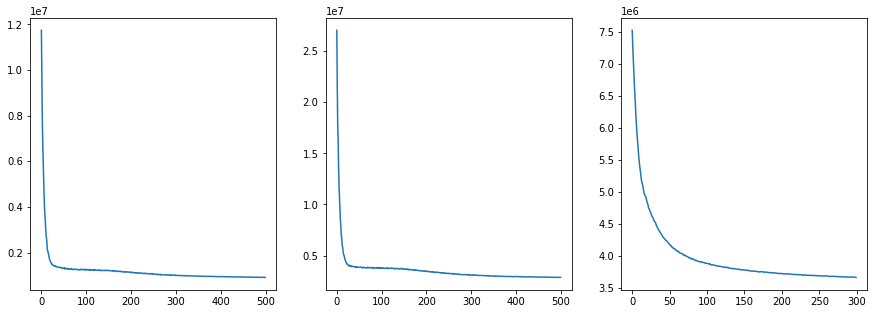

In [10]:
print(result['loss'].keys())
fig,axes = plt.subplots(1,3,figsize=(15,5))
axes[0].plot(result['loss']['W1'])
axes[1].plot(result['loss']['W2'])
axes[2].plot(result['loss']['iPoLNG'])

In [11]:
result['alpha0s']

{'W1': 5.843589597346264, 'W2': 7.599075458477387}